# 6549 히스토그램에서 가장 큰 직사각형 ★★★
다른 블로그 참조 : O

reference : https://aodtns.tistory.com/45

### Q)
히스토그램은 직사각형 여러 개가 아래쪽으로 정렬되어 있는 도형이다. 각 직사각형은 같은 너비를 가지고 있지만, 높이는 서로 다를 수도 있다. 예를 들어, 왼쪽 그림은 높이가 2, 1, 4, 5, 1, 3, 3이고 너비가 1인 직사각형으로 이루어진 히스토그램이다.

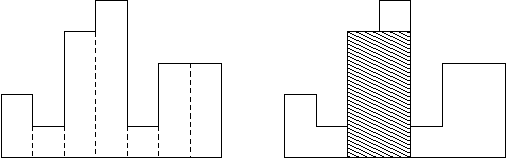

히스토그램에서 가장 넓이가 큰 직사각형을 구하는 프로그램을 작성하시오.

### Input)
입력은 테스트 케이스 여러 개로 이루어져 있다. 각 테스트 케이스는 한 줄로 이루어져 있고, 직사각형의 수 n이 가장 처음으로 주어진다. (1 ≤ n ≤ 100,000) 그 다음 n개의 정수 h1, ..., hn (0 ≤ hi ≤ 1,000,000,000)가 주어진다. 이 숫자들은 히스토그램에 있는 직사각형의 높이이며, 왼쪽부터 오른쪽까지 순서대로 주어진다. 모든 직사각형의 너비는 1이고, 입력의 마지막 줄에는 0이 하나 주어진다.

### Output)
각 테스트 케이스에 대해서, 히스토그램에서 가장 넓이가 큰 직사각형의 넓이를 출력한다.

### Source Code)

#### 1. 첫 번째 코드 - 시간 초과

In [ ]:
from sys import stdin
input = stdin.readline

data = list(map(int, input().split()))
n = data[0]
h = data[1:]

while n != 0:
    
    width = n

    res = 0

    while width > 0:
        for i in range(0, n-width+1):
            res = max(res, width*min(h[i:i+width]))

        width -= 1

    print(res)

    data = list(map(int, input().split()))
    n = data[0]
    h = data[1:]

위 코드는 당연히 시간 초과가 날 것이라 생각하였지만 마땅히 떠오르는 방법이 없었다.

#### 2. 두 번째 코드

In [ ]:
from sys import stdin
input = stdin.readline

def divide_conquer(h, start, end):
    if start == end:
        return h[start]
    else:
        mid = (start + end) // 2
        width = 2 # 너비 의미
        left = mid # 경계 왼쪽
        right = mid + 1 # 경계 오른쪽
        min_tmp = min(h[left], h[right]) # 경계 좌우 중 작은 값 저장
        tmp = width * min_tmp

        while True:
            if(h[left] == 0 or left == start) and (h[right] == 0 or right == end):
                # 왼쪽 경계의 값이 0이거나 더 이상 왼쪽으로 이동 불가 and
                # 오른쪽 경계의 값이 0이거나 더 이상 오른쪽으로 이동 불가
                # 반복문 탈출
                break

            elif h[left] == 0 or left == start: # 왼쪽 경계 값이 0이거나 제일 왼쪽으로 모두 이동한 경우
                if h[right + 1] < min_tmp: # 경계 오른쪽으로 이동하는데, 만약 min_tmp 보다 값이 작아야 갱신
                    min_tmp = h[right + 1]
                right += 1
            elif h[right] == 0 or right == end: # 오른쪽 경계 값이 0이거나 제일 오른쪽으로 모두 이동한 경우
                if h[left - 1] < min_tmp:
                    min_tmp = h[left - 1]
                left -= 1
            else: # 왼쪽 혹은 오른쪽으로 모두 이동할 수 있는 경우
                if h[left - 1] > h[right + 1]: # 왼쪽으로 이동시 값이 더 큼
                    if h[left - 1] < min_tmp:
                        min_tmp = h[left - 1]
                    left -= 1
                else:
                    if h[right + 1] < min_tmp:
                        min_tmp = h[right + 1]
                    right += 1
            width += 1 # 이동할 때마다 너비 1 증가

            tmp = max(tmp, min_tmp * width) # 이전의 tmp와 min_tmp에 너비를 곱한 값 중 큰 값 저장
        return max(divide_conquer(h, start, mid), divide_conquer(h, mid+1, end), tmp)

data = list(map(int, input().split()))
n = data[0]
h = data[1:]

while n != 0:
    print(divide_conquer(h, 0, n-1))

    data = list(map(int, input().split()))
    n = data[0]
    h = data[1:]

지금까지 풀어본 문제 중 가장 어렵고 다른 블로그를 통해 참조를 해봤지만 여러번 봐야 이해를 할 수 있었다.

말로 설명하는 것 보다 프로그래밍한 코드를 그림으로 나타내 확인하는 것이 더 이해하기 좋을 것 같아 그림으로 설명을 대신하겠다.

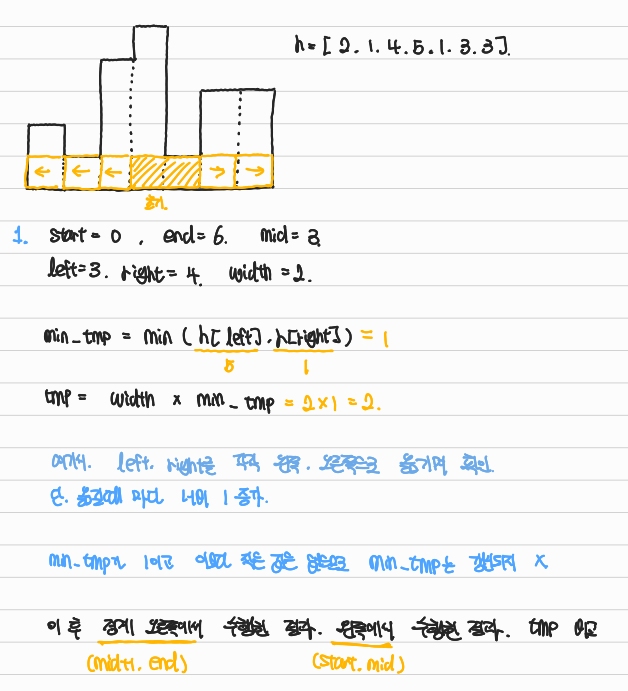

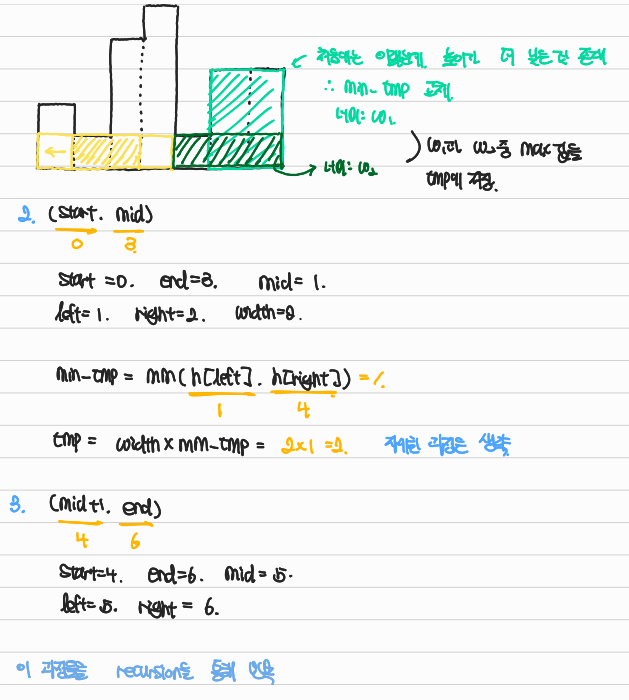

정말 아직 알고리즘적으로도 실력적으로도 부족한 점이 많다는 것을 느꼈다.